In [94]:
#109

In [95]:
t<-c(1,2,3,4,5,6,7,8,9,10,11,12)
T<-c(29.6,34.7,46.1,58.0,69.9,79.2,83.5,81.2,73.9,62.1,47.1,34.4)

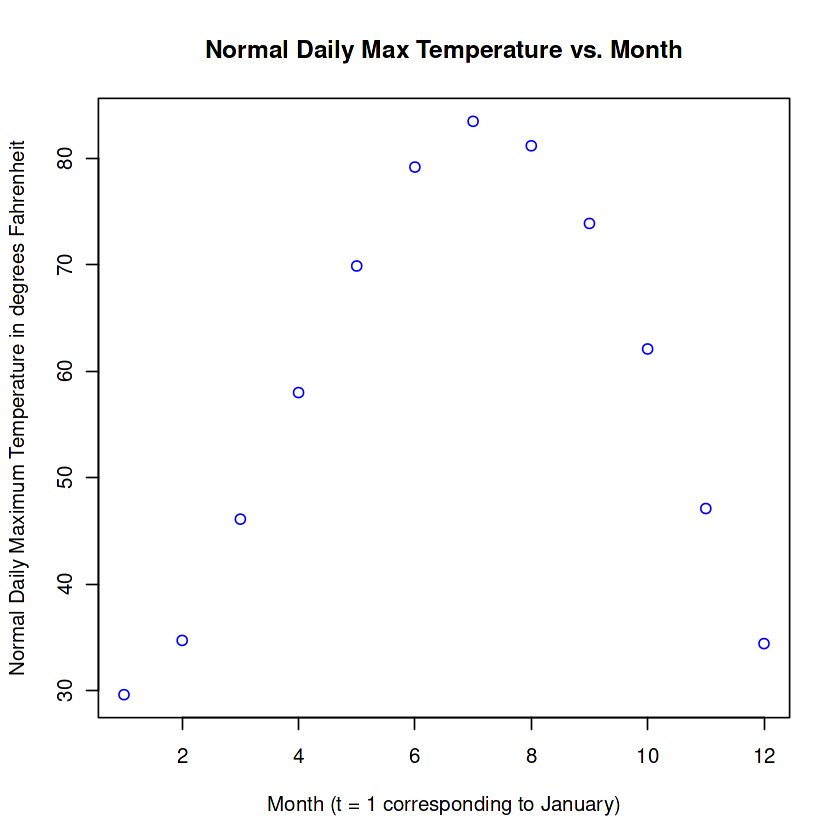

In [96]:
plot(t,T,col="blue",main="Normal Daily Max Temperature vs. Month",xlab="Month (t = 1 corresponding to January)",ylab="Normal Daily Maximum Temperature in degrees Fahrenheit")

In [97]:
library("ShellChron")

In [98]:
sinrelation=sinreg(t, T)

In [99]:
sinrelation
print(sinrelation)
summary(sinrelation)

[[1]]
[1]  6.031322e+01  2.551588e+01  1.100000e+01 -1.594538e+00  9.700057e-01
[6]  5.681923e-08

[[2]]
       1        2        3        4        5        6        7        8 
36.25459 35.47860 42.58742 55.32406 69.64472 81.00270 85.79191 82.49181 
       9       10       11       12 
72.15018 58.05039 44.66903 36.25459

[[1]]
[1]  6.031322e+01  2.551588e+01  1.100000e+01 -1.594538e+00  9.700057e-01
[6]  5.681923e-08

[[2]]
       1        2        3        4        5        6        7        8 
36.25459 35.47860 42.58742 55.32406 69.64472 81.00270 85.79191 82.49181 
       9       10       11       12 
72.15018 58.05039 44.66903 36.25459 



     Length Class  Mode   
[1,]  6     -none- numeric
[2,] 12     -none- numeric

In [100]:
sinConvert<-function(val) {
    sin((2*pi/24)*val - 2*pi/24)
}

tsin=sapply(t, sinConvert)
print(tsin)

 [1] 0.0000000 0.2588190 0.5000000 0.7071068 0.8660254 0.9659258 1.0000000
 [8] 0.9659258 0.8660254 0.7071068 0.5000000 0.2588190


In [101]:
relation<-lm(T~I(tsin))
print(relation)
summary(relation)


Call:
lm(formula = T ~ I(tsin))

Coefficients:
(Intercept)      I(tsin)  
      21.41        58.29  




Call:
lm(formula = T ~ I(tsin))

Residuals:
   Min     1Q Median     3Q    Max 
-4.629 -2.439 -1.164  2.377  8.186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.414      2.631    8.14 1.01e-05 ***
I(tsin)       58.287      3.720   15.67 2.30e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.062 on 10 degrees of freedom
Multiple R-squared:  0.9609,	Adjusted R-squared:  0.9569 
F-statistic: 245.5 on 1 and 10 DF,  p-value: 2.299e-08


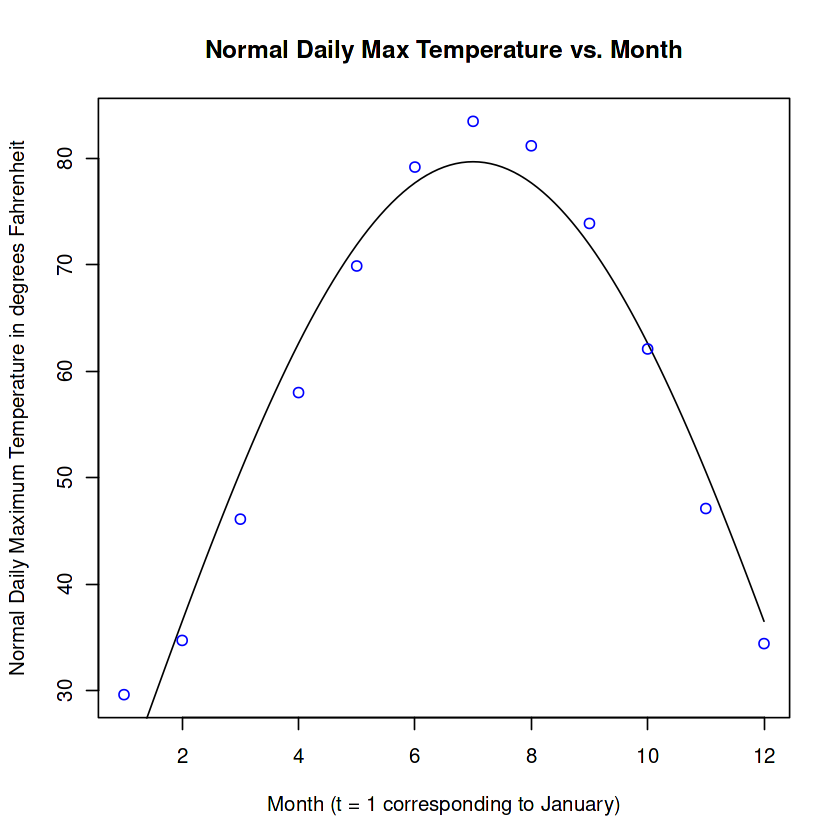

In [102]:
t_seq <- seq(from=1,to=12, by=0.1)
new_relation<-list(0)
for (i in 1:length(t_seq)) {
    tsin_new <- data.frame(tsin=t_seq[i])
    tsin_new_convert = sinConvert(tsin_new)
    new_relation[i]<-predict(relation, tsin_new_convert)
}
plot(t,T,col="blue",main="Normal Daily Max Temperature vs. Month",xlab="Month (t = 1 corresponding to January)",ylab="Normal Daily Maximum Temperature in degrees Fahrenheit",lines(t_seq, new_relation))

In [103]:
RSE_Percent = 4.062/mean(T) * 100
print (RSE_Percent)

[1] 6.966414


In [104]:
confint(relation, level=0.95)

,2.5 %,97.5 %
(Intercept),15.55234,27.27485
I(tsin),49.99834,66.57647


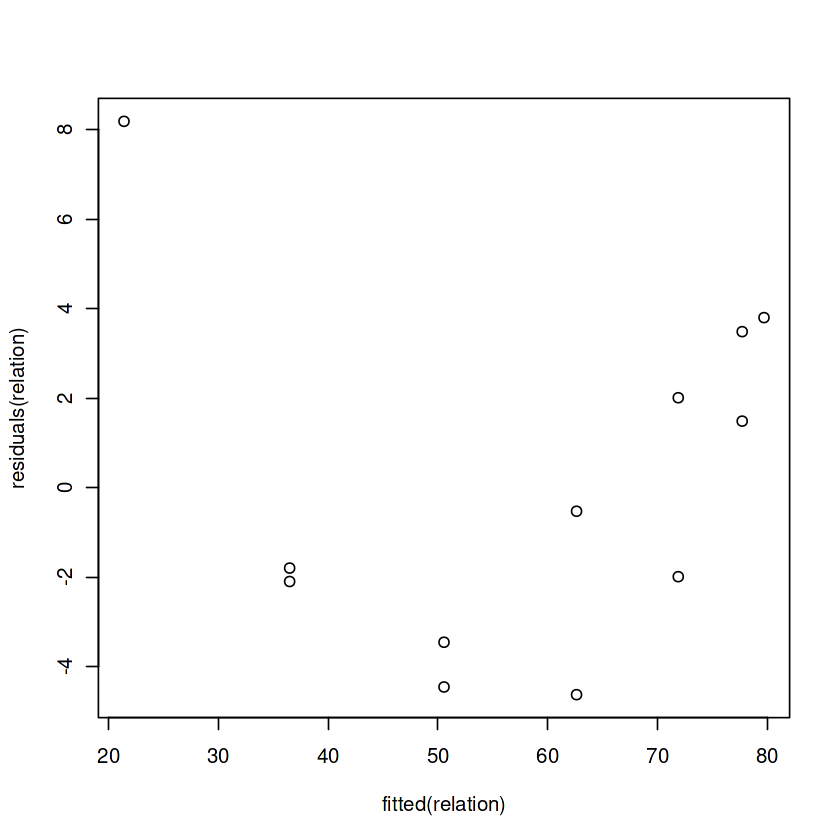

In [105]:
plot(fitted(relation), residuals(relation))